In [1]:
from importlib import reload
import sys
sys.path.append("..")
import os
import persist_to_disk as ptd
ptd.config.set_project_path(os.path.abspath("../"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

%matplotlib inline

In [2]:
import scripts.evaluate as se
res_full = se.Config.tidy_run(se.Config.mnist_add())

100%|████████████████████| 327/327 [00:00<00:00, 345.91it/s]


FavMac          36.541333
FPCP            36.112364
FullUniverse    35.247242
dtype: float64


Text(0.5, 0, 'Target Cost')

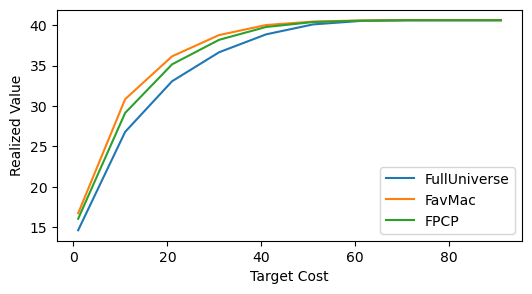

In [3]:
delta = 0.1

METHOD_MAPPING = { 'ClassWise': 'ClassWise', 'GP+DS':'FPCP', "GR": 'FavMac', 'Full': 'FullUniverse'}

tc2value_m = {}
for method, tres in res_full[delta].items():
    if method not in METHOD_MAPPING: continue
    tc2value_m[METHOD_MAPPING[method]] = se.Evaluator.eval_target2meanutil(tres, 'value') * 100
    tc2value_m[METHOD_MAPPING[method]].index *= 100
ax = pd.DataFrame(tc2value_m).plot(figsize=(6,3))
print(pd.DataFrame(tc2value_m).dropna(how='any').mean().sort_values(ascending=False))
ax.set_ylabel("Realized Value")
ax.set_xlabel("Target Cost")

In [4]:
# The results are summarized in this flat table.
# For example, the last row means the *max* (describe) of *violation* (metric) is 0.0 (value) for GreedyProba+DeepSet (aka FPCP) 
# given seed, target_cost, and delta
se.Evaluator.flatten_summary(res_full)

/home/zhenlin4/miniconda3/envs/favmac/lib/python3.9/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,seed,describe,metric,value,target_cost,method,delta
0,0,count,thres,2000.000000,0.01,GV,NaN
1,0,count,cost,2000.000000,0.01,GV,NaN
2,0,count,value,2000.000000,0.01,GV,NaN
3,0,count,|S|,2000.000000,0.01,GV,NaN
4,0,count,violation,2000.000000,0.01,GV,NaN
...,...,...,...,...,...,...,...
12739,2,max,thres,inf,0.91,GP+DS,0.1
12740,2,max,cost,0.900000,0.91,GP+DS,0.1
12741,2,max,value,0.981818,0.91,GP+DS,0.1
12742,2,max,|S|,10.000000,0.91,GP+DS,0.1
